In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('data/agaricus-lepiota.data', header=None, names=["poisonous", "cap-shape", "cap-surface", 
                                                                     "cap-color", "bruises","odor", "gill-attachment", 
                                                                     "gill-spacing", "gill-size", "gill-color", "stalk-shape",
                                                                     "stalk-root", "stalk-surface-above-ring", 
                                                                     "stalk-surface-below-ring", "stalk-color-above-ring", 
                                                                     "stalk-color-below-ring", "veil-type", "veil-color",
                                                                     "ring-number", "ring-type", "spore-print-color",
                                                                     "population", "habitat"
                                                                     ])
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['poisonous',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [6]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

[]

In [7]:
for col in cat_cols:
    print(f'{col} {df[col].unique()}')

poisonous ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
df["stalk-root"] = df["stalk-root"].apply(lambda x: x if x != "?" else None)

In [9]:
df["stalk-root"].unique()

array(['e', 'c', 'b', 'r', None], dtype=object)

In [10]:
value_counts = df['poisonous'].value_counts()
categories = value_counts.index
counts = value_counts.values 

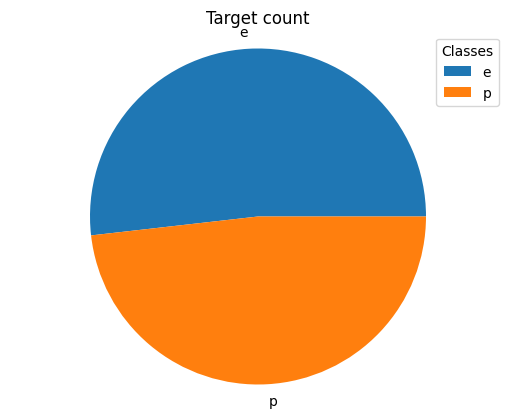

In [11]:
plt.pie(counts, labels=categories)
plt.axis('equal')
plt.title('Target count')
plt.legend(categories, title='Classes', loc='best')
plt.show()

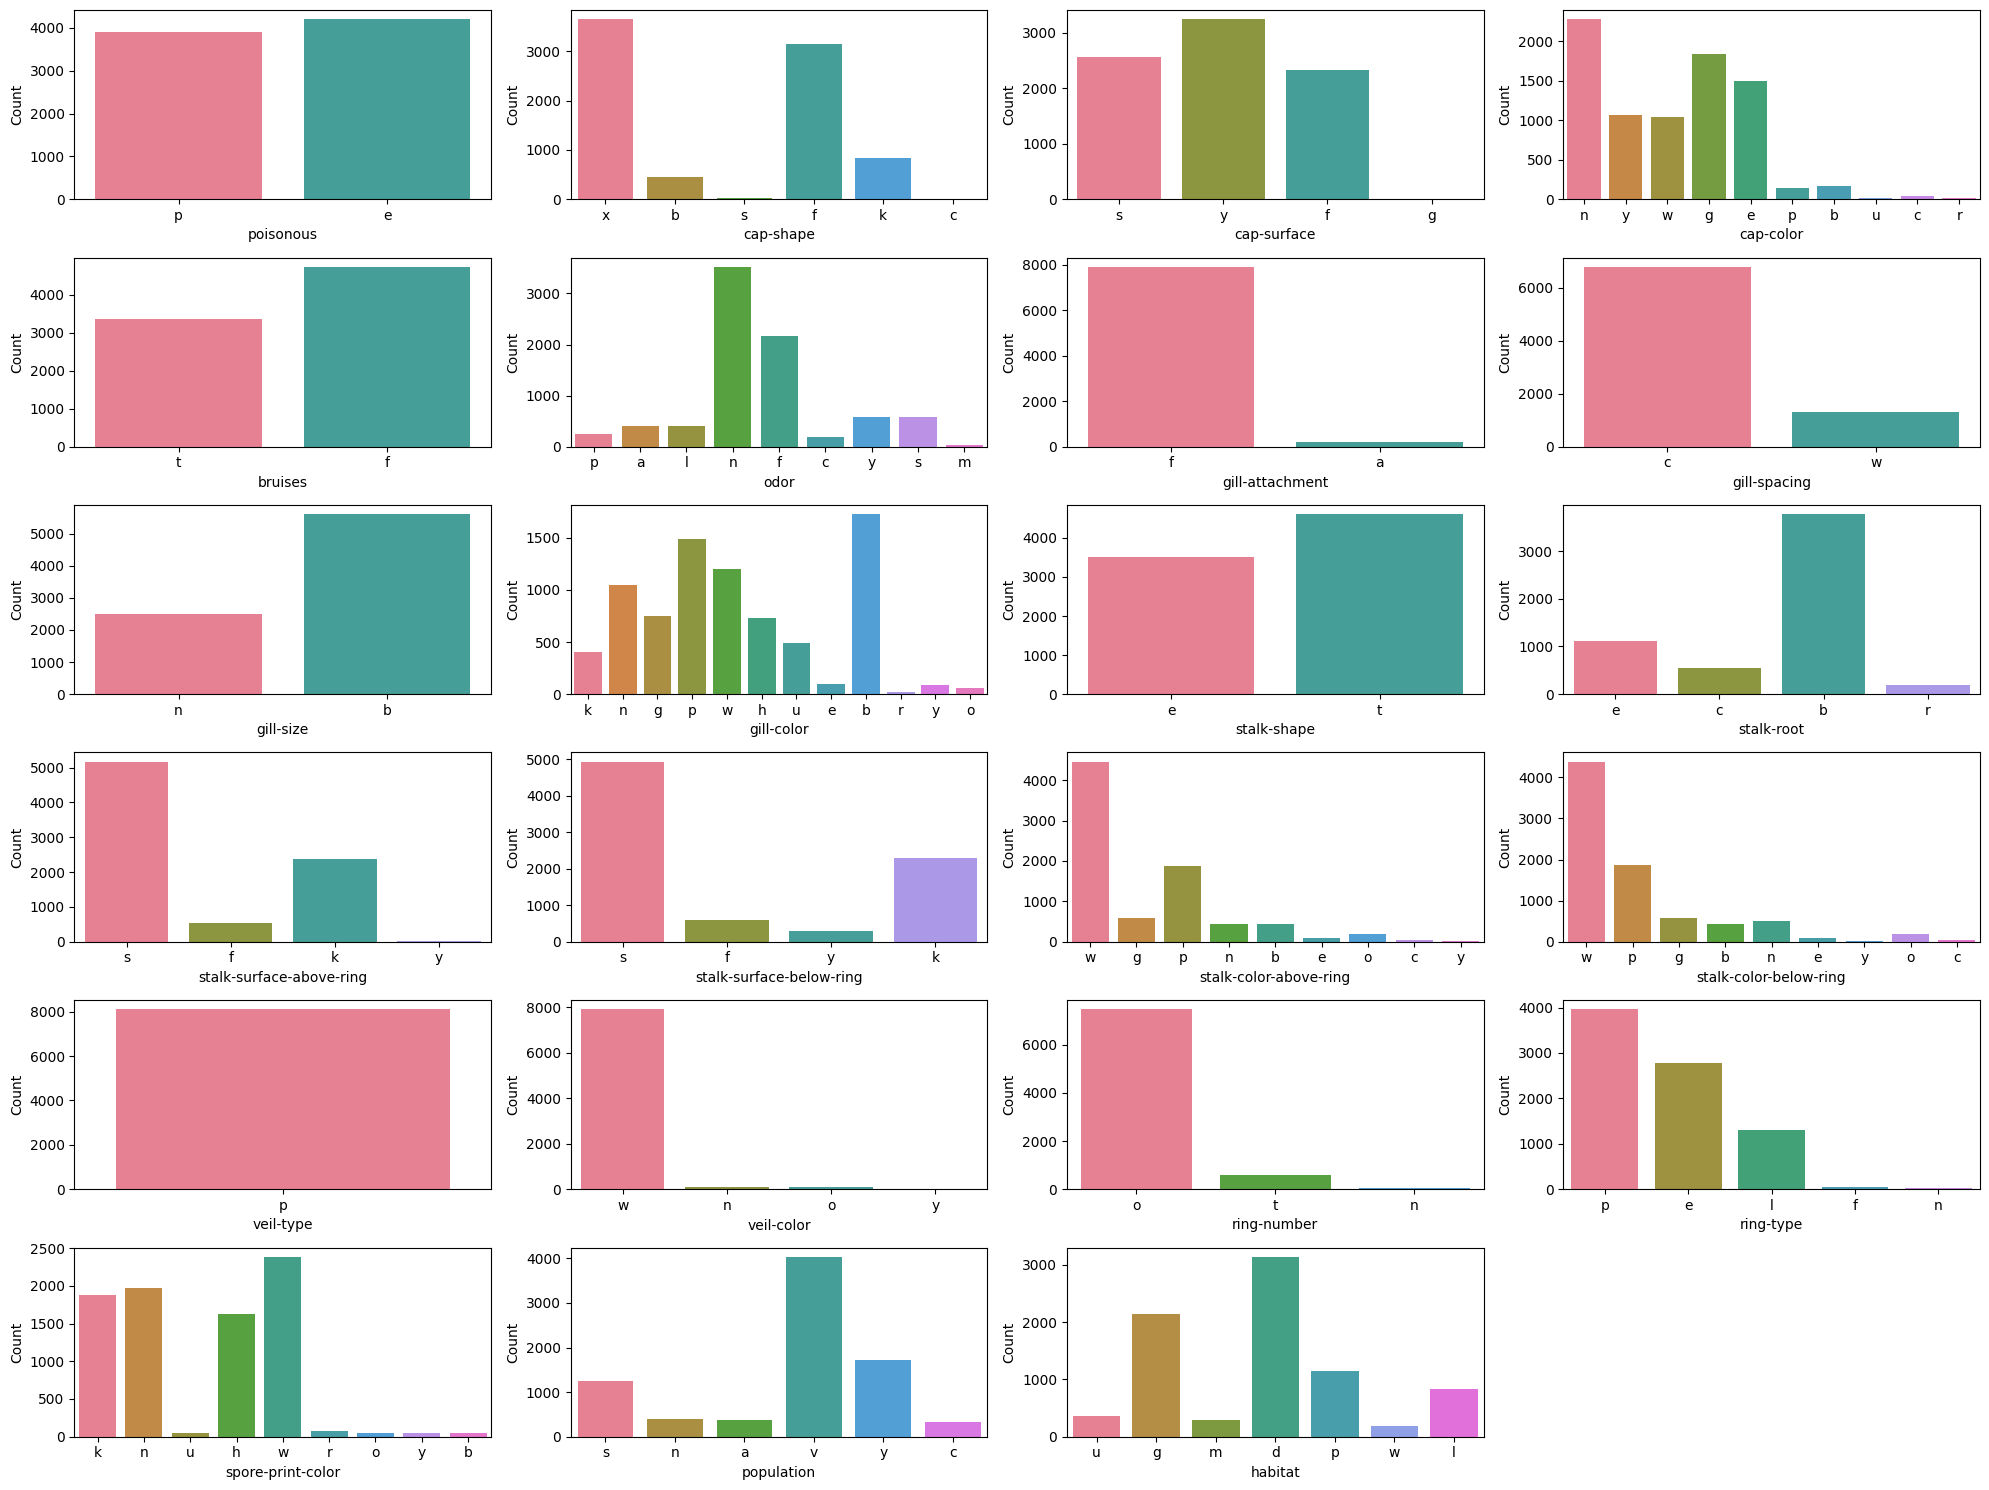

In [12]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(6, 4, i)
    sb.countplot(data=df, x=column, palette='husl')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
df[cat_cols].isnull().sum()

poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [14]:
mode_values = df[cat_cols].mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values) 

In [15]:
df[cat_cols].isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
LabelEncoder = LabelEncoder()

for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [17]:
df.sample(3)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3582,0,2,3,4,1,5,1,0,0,9,...,2,7,3,0,2,1,4,2,5,0
7505,1,3,2,4,0,8,1,0,1,0,...,2,6,6,0,2,1,0,7,4,4
2538,0,5,0,2,1,5,1,0,0,5,...,2,7,3,0,2,1,4,2,4,0


In [18]:
result_df = pd.DataFrame(columns=["kernel", "accuracy", "recall", "precision", "f1-score"])

In [19]:
y = df['poisonous']
X = df.drop(['poisonous'], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

In [21]:
def eval(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    print(f"""
    Accuracy: {accuracy_score(y_test, y_pred)}
    Recall: {recall_score(y_test, y_pred, average="weighted")}
    Precision: {precision_score(y_test, y_pred, average="weighted")}
    F1-score: {f1_score(y_test, y_pred, average="weighted")}
    """)
    
    print(confusion_matrix(y_test, y_pred))

    return(accuracy_score(y_test, y_pred), 
           recall_score(y_test, y_pred, average="weighted"), 
           precision_score(y_test, y_pred, average="weighted"), 
           f1_score(y_test, y_pred, average="weighted")
           )


In [22]:
def build_custom_gaussian_kernel(sigma):

    """
        Citation:

        Yaohua Tang, Weimin Guo and Jinghuai Gao, 
        "Efficient model selection for Support Vector Machine with Gaussian kernel function," 
        2009 IEEE Symposium on Computational Intelligence and Data Mining, Nashville, TN, 2009, pp. 40-45, 
        doi: 10.1109/CIDM.2009.4938627.
    
    """
    
    def custom_gaussian_kernel(_x1, _x2):
        diff = np.array(_x1)[:, np.newaxis] - np.array(_x2)
        normsq = np.square(np.linalg.norm(diff, axis = 2))
        return np.exp(- normsq / (2 * np.square(sigma)))

    return custom_gaussian_kernel

In [23]:
clf = SVC(kernel=build_custom_gaussian_kernel(sigma=1))
result_df.loc[len(result_df.index)] = ["Gaussian", *eval(clf, X_train, y_train, X_test, y_test)]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       990

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


    Accuracy: 1.0
    Recall: 1.0
    Precision: 1.0
    F1-score: 1.0
    
[[1041    0]
 [   0  990]]


In [24]:
clf = SVC(kernel='linear')
result_df.loc[len(result_df.index)] = ["Linear", *eval(clf, X_train, y_train, X_test, y_test)]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1041
           1       0.98      0.98      0.98       990

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031


    Accuracy: 0.9803052683407188
    Recall: 0.9803052683407188
    Precision: 0.9803107770625026
    F1-score: 0.9803042171742368
    
[[1023   18]
 [  22  968]]


In [25]:
clf = SVC(kernel='poly')
result_df.loc[len(result_df.index)] = ["Polynomial", *eval(clf, X_train, y_train, X_test, y_test)]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1041
           1       1.00      0.99      1.00       990

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


    Accuracy: 0.9965534219596258
    Recall: 0.9965534219596258
    Precision: 0.996576442996155
    F1-score: 0.9965530824527102
    
[[1041    0]
 [   7  983]]


In [26]:
clf = SVC(kernel='rbf')
result_df.loc[len(result_df.index)] = ["Radial", *eval(clf, X_train, y_train, X_test, y_test)]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       1.00      0.98      0.99       990

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031


    Accuracy: 0.9901526341703595
    Recall: 0.9901526341703595
    Precision: 0.9903025246957751
    F1-score: 0.990149665763884
    
[[1040    1]
 [  19  971]]


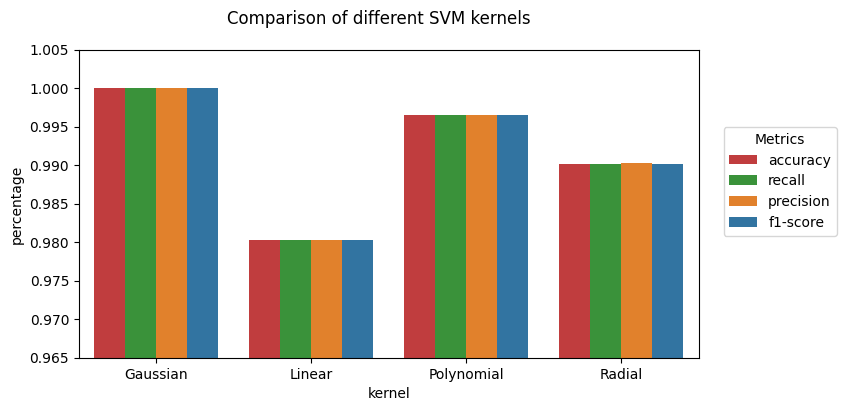

In [27]:
result_dfm = pd.melt(result_df, id_vars=("kernel"), value_vars=("accuracy", "recall", "precision", "f1-score"), var_name="metric", value_name="percentage")
fig, ax1 = plt.subplots(figsize=(8, 4))
fig.suptitle("Comparison of different SVM kernels")
sb.barplot(ax=ax1, data=result_dfm, x="kernel", y="percentage", hue="metric", palette=["tab:red", "tab:green", "tab:orange", "tab:blue"])
ax1.legend(bbox_to_anchor=(1.04, 0.75), borderaxespad=0, title="Metrics")
ax1.set_ylim(0.965, 1.005)
plt.show()

In [28]:
def cross_validate(clf):
    cv_result_df = pd.DataFrame(columns=["fold", "accuracy", "recall", "precision", "f1-score"])
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    for i, (train_index, test_index) in enumerate(cv.split(X)):
        X_train, y_train = X.loc[train_index], y[train_index]
        X_test, y_test = X.loc[test_index], y[test_index] 

        print(f"Fold {i}:")
        cv_result_df.loc[len(cv_result_df.index)] = [i, *eval(clf, X_train, y_train, X_test, y_test)]
        print("-"*80)
    return cv_result_df

In [29]:
def display_cv_plot(result_df, sigma):
    result_dfm = pd.melt(result_df, id_vars=("fold"), value_vars=("accuracy", "recall", "precision", "f1-score"), var_name="metric", value_name="percentage")
    fig, ax1 = plt.subplots(figsize=(12, 4))
    fig.suptitle(f"Cross-validation results of gaussian kernel with sigma={sigma}")
    sb.barplot(ax=ax1, data=result_dfm, x="fold", y="percentage", hue="metric", palette=["tab:red", "tab:green", "tab:orange", "tab:blue"])
    ax1.legend(bbox_to_anchor=(1.04, 0.75), borderaxespad=0, title="Metrics")
    ax1.set_ylim(0.9, 1.01)
    plt.show()

In [30]:
clf = SVC(kernel=build_custom_gaussian_kernel(sigma=0.5))
cv_result = cross_validate(clf)

Fold 0:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       424
           1       1.00      0.98      0.99       389

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813


    Accuracy: 0.988929889298893
    Recall: 0.988929889298893
    Precision: 0.9891599839785926
    F1-score: 0.9889232374865593
    
[[424   0]
 [  9 380]]
--------------------------------------------------------------------------------
Fold 1:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       429
           1       1.00      0.97      0.99       384

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813


    Accuracy: 0.9876998769987699
    Recall: 0.9876998769987699
    Precision: 0.987980062

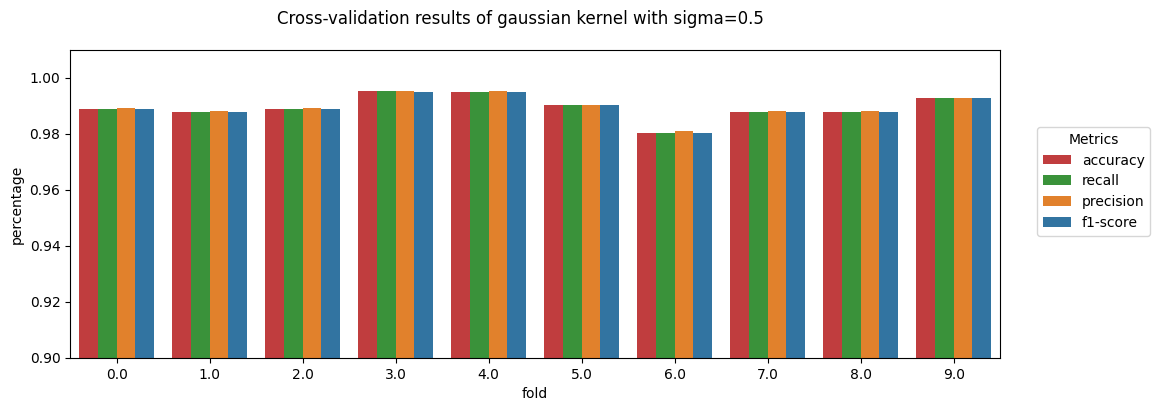

In [31]:
display_cv_plot(cv_result, 0.5)

In [32]:
clf = SVC(kernel=build_custom_gaussian_kernel(sigma=1))
cv_result = cross_validate(clf)

Fold 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       389

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813


    Accuracy: 1.0
    Recall: 1.0
    Precision: 1.0
    F1-score: 1.0
    
[[424   0]
 [  0 389]]
--------------------------------------------------------------------------------
Fold 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       384

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813


    Accuracy: 1.0
    Recall: 1.0
    Precision: 1.0
    F1-score: 1.0
    
[[429   0]
 [  0 384]]
-------------------------------------------------

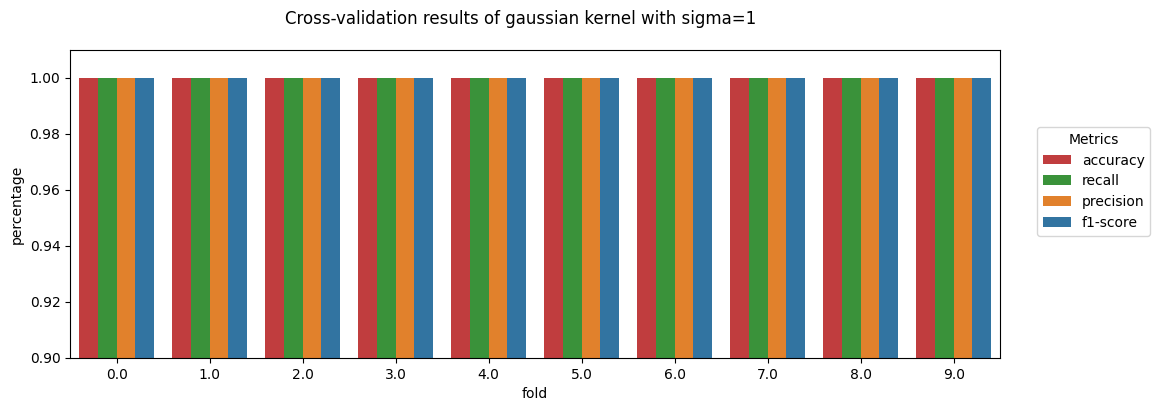

In [33]:
display_cv_plot(cv_result, 1)

In [34]:
clf = SVC(kernel=build_custom_gaussian_kernel(sigma=2))
cv_result = cross_validate(clf)

Fold 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       389

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813


    Accuracy: 1.0
    Recall: 1.0
    Precision: 1.0
    F1-score: 1.0
    
[[424   0]
 [  0 389]]
--------------------------------------------------------------------------------
Fold 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       384

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813


    Accuracy: 1.0
    Recall: 1.0
    Precision: 1.0
    F1-score: 1.0
    
[[429   0]
 [  0 384]]
-------------------------------------------------

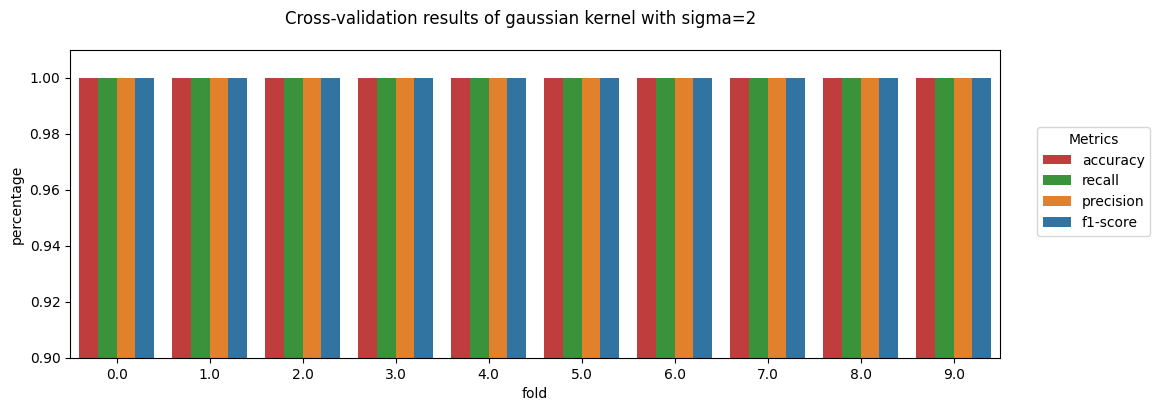

In [35]:
display_cv_plot(cv_result, 2)